In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harsh2040/wns-triange-hack-quest")

print("Path to dataset files:", path)

100%|██████████| 1.41G/1.41G [00:16<00:00, 94.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1"
print(os.listdir(dataset_path))

['test (1)', 'train (1)']


In [ ]:
import os
from sklearn.model_selection import train_test_split

dataset_path = "/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1"
train_folder = os.path.join(dataset_path, "train (1)")
test_folder = os.path.join(dataset_path, "test (1)")

In [ ]:
subdirs = [d for d in os.listdir(train_folder) if os.path.isdir(os.path.join(train_folder, d))]
print("Subdirectories inside train (1):", subdirs)
if subdirs:
    sample_subdir = os.path.join(train_folder, subdirs[0])  # Pick first subdirectory
    sample_images = [f for f in os.listdir(sample_subdir) if f.endswith(('.jpg', '.png', '.jpeg'))]
    print(f"Sample images inside {subdirs[0]}:", sample_images[:5])


Subdirectories inside train (1): ['train']
Sample images inside train: []


In [ ]:
train_inner_folder = os.path.join(train_folder, "train")  # Path to nested 'train' folder
print("Files inside train folder:", os.listdir(train_inner_folder)[:10])  # Show first 10 items


Files inside train folder: ['images', 'train.csv']


In [ ]:
import pandas as pd

csv_path = os.path.join(train_inner_folder, "train.csv")
train_data = pd.read_csv(csv_path)

print(train_data.head())  # Check first few rows


   image_id filename  label
0         1    1.jpg      0
1         2    2.jpg      0
2         3    3.jpg      0
3         4    4.jpg      0
4         5    5.jpg      0


In [ ]:
image_folder = os.path.join(train_inner_folder, "images")  # Path to images folder

train_data["filepath"] = train_data["filename"].apply(lambda x: os.path.join(image_folder, x))
train_labels = train_data["label"].astype(str)

print(train_data.head())  # Verify paths


   image_id filename  label                                           filepath
0         1    1.jpg      0  /root/.cache/kagglehub/datasets/harsh2040/wns-...
1         2    2.jpg      0  /root/.cache/kagglehub/datasets/harsh2040/wns-...
2         3    3.jpg      0  /root/.cache/kagglehub/datasets/harsh2040/wns-...
3         4    4.jpg      0  /root/.cache/kagglehub/datasets/harsh2040/wns-...
4         5    5.jpg      0  /root/.cache/kagglehub/datasets/harsh2040/wns-...


In [ ]:
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_data["filepath"], train_labels, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.model_selection import train_test_split

# Define image paths and labels
image_paths = train_data["filepath"].tolist()
labels = train_data["label"].astype(str).tolist()  # Convert labels to string if needed

# Split into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42
)

# Print samples
print("Training samples:", train_images[:5])
print("Validation samples:", val_images[:5])


Training samples: ['/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1/train (1)/train/images/7808.jpg', '/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1/train (1)/train/images/4439.jpg', '/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1/train (1)/train/images/7180.jpg', '/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1/train (1)/train/images/4962.jpg', '/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1/train (1)/train/images/7774.jpg']
Validation samples: ['/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1/train (1)/train/images/2810.jpg', '/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1/train (1)/train/images/7441.jpg', '/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1/train (1)/train/images/7621.jpg', '/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versio

In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1"
print("Contents of dataset path:", os.listdir(dataset_path))

train_folder = os.path.join(dataset_path, "train (1)")
print("Contents of train folder:", os.listdir(train_folder))


Contents of dataset path: ['test (1)', 'train (1)']
Contents of train folder: ['train']


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1/train (1)"
train_folder = os.path.join(dataset_path, "train")

print("Contents of train folder:", os.listdir(train_folder))

# Check inside 'train' folder
train_images_folder = os.path.join(train_folder, "images")
if os.path.exists(train_images_folder):
    print("Contents of images folder:", os.listdir(train_images_folder)[:5])  # Show first 5 images
else:
    print("Images folder NOT found!")


Contents of train folder: ['images', 'train.csv']
Contents of images folder: ['7331.jpg', '2680.jpg', '7587.jpg', '6340.jpg', '3281.jpg']


In [ ]:
print("Total valid images found:", len(train_data))
print("Sample image paths:", train_data["filename"].head())


Total valid images found: 8079
Sample image paths: 0    1.jpg
1    2.jpg
2    3.jpg
3    4.jpg
4    5.jpg
Name: filename, dtype: object


In [ ]:
import os
import h5py
import math
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.preprocessing import image
#from keras.utils import layer_utils
#from keras.utils.data_utils import get_file
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline
import tensorflow.keras.backend as K
# Image dataset has channels as its last dimensions
K.set_image_data_format('channels_last')

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import os

# Define dataset paths
dataset_path = "/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1/train (1)"
csv_path = os.path.join(dataset_path, "train", "train.csv")
images_folder = os.path.join(dataset_path, "train", "images")

# Load CSV
train_data = pd.read_csv(csv_path)

# Fix file paths for images
train_data["filename"] = train_data["filename"].apply(lambda x: os.path.join(images_folder, x))

# Convert labels to string
train_data["label"] = train_data["label"].astype(str)

# Remove missing images
train_data = train_data[train_data["filename"].apply(os.path.exists)]

print("Total valid images found:", len(train_data))
print("Sample image paths:", train_data["filename"].head())

# Split data
train_images, val_images, train_labels, val_labels = train_test_split(
    train_data["filename"], train_data["label"], test_size=0.2, random_state=42
)

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
)

batch_size = 32  # Reduced batch size

num_classes = len(np.unique(train_labels))

train_generator = train_datagen.flow_from_dataframe(
    pd.DataFrame({"filename": train_images, "label": train_labels}),
    x_col="filename",
    y_col="label",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    workers=4,  # Increased workers
    use_multiprocessing=True
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

val_generator = val_datagen.flow_from_dataframe(
    pd.DataFrame({"filename": val_images, "label": val_labels}),
    x_col="filename",
    y_col="label",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
    workers=4,
    use_multiprocessing=True
)

# Load pre-trained ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)

# Create the model
model = models.Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
)

Total valid images found: 8079
Sample image paths: 0    /root/.cache/kagglehub/datasets/harsh2040/wns-...
1    /root/.cache/kagglehub/datasets/harsh2040/wns-...
2    /root/.cache/kagglehub/datasets/harsh2040/wns-...
3    /root/.cache/kagglehub/datasets/harsh2040/wns-...
4    /root/.cache/kagglehub/datasets/harsh2040/wns-...
Name: filename, dtype: object
Found 6463 validated image filenames belonging to 2 classes.
Found 1616 validated image filenames belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 144s 645ms/step - accuracy: 0.9378 - loss: 0.3506 - val_accuracy: 0.9455 - val_loss: 0.1916
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 121s 576ms/step - accuracy: 0.9441 - loss: 0.2134 - val_accuracy: 0.9455 - val_loss: 0.1933
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 117s 579ms/step - accuracy: 0.9376 - loss: 0.2255 - val_accuracy: 0.9468 - val_loss: 0.1922
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 118s 586ms/step - accuracy: 0.9423 - loss: 0.2052 - val_accuracy: 0.9455 - val_loss: 0.1905
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 118s 582ms/step - accuracy: 0.9456 - loss: 0.2037 - val_accuracy: 0.9462 - val_loss: 0.1885
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 116s 575ms/step - accuracy: 0.9438 - loss: 0.2052 - val_accuracy: 0.9455 - val_loss: 0.1942
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 115s 571ms/step - accuracy: 0.9403 - loss: 0.2158 - val_accuracy: 0.9455 - val_loss: 0.1891
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 118s 583ms/step - accuracy: 0.9413 -

In [ ]:
model.save('resnet.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/resnet.h5')

#**For testing**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import os

# Define dataset paths
test_dataset_path = "/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1/test (1)"
test_csv_path = os.path.join(test_dataset_path, "test", "test.csv")
test_images_folder = os.path.join(test_dataset_path, "test", "images")

# Load test CSV (assuming it only has filenames)
test_data = pd.read_csv(test_csv_path)

# Fix file paths for test images
test_data["filename"] = test_data["filename"].apply(lambda x: os.path.join(test_images_folder, x))

# Create a test ImageDataGenerator (only rescaling is needed)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Since there are no labels, set y_col=None and class_mode=None
test_generator = test_datagen.flow_from_dataframe(
    test_data,
    x_col="filename",
    y_col=None,  # No labels in test dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,  # Returns only the images
    shuffle=False
)

# Generate predictions on test data
predictions = model.predict(test_generator)

# If you need to convert the predictions to class labels (assuming categorical classification)
predicted_classes = np.argmax(predictions, axis=1)




Found 3462 validated image filenames.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 34s 241ms/step


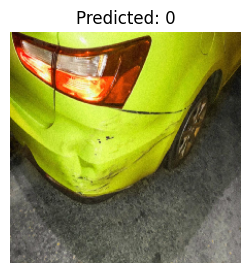

Image 1: Predicted class: 0


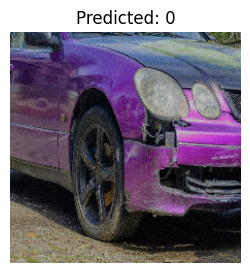

Image 2: Predicted class: 0


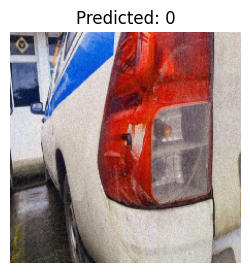

Image 3: Predicted class: 0


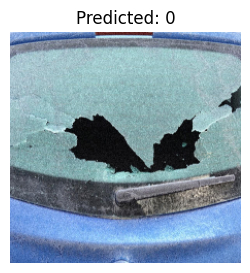

Image 4: Predicted class: 0


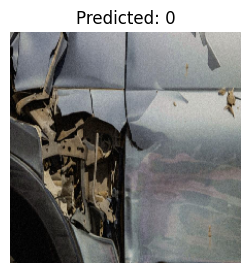

Image 5: Predicted class: 0


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
for i in range(5):  # Display the first 5 images and predictions
    # Get the image path
    image_path = test_data["filename"].iloc[i]

    # Load the image using Keras preprocessing
    img = image.load_img(image_path, target_size=(224, 224))

    # Convert the image to an array
    img_array = image.img_to_array(img)

    # Plot the image
    plt.figure(figsize=(3, 3))
    plt.imshow(img_array / 255.0)  # Normalize to [0, 1]
    plt.axis('off')

    # Print the predicted label
    predicted_label = predicted_classes[i]
    plt.title(f"Predicted: {predicted_label}")

    # Show the image
    plt.show()

    # Optionally, print the label for verification
    print(f"Image {i + 1}: Predicted class: {predicted_label}")

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


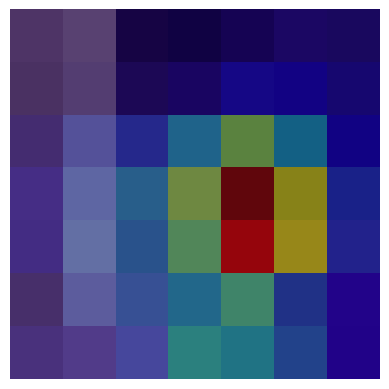

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image

# Define function to generate Grad-CAM heatmap
def generate_gradcam_heatmap(model, img_array, last_conv_layer_name, classifier_layer_names):
    # Get the model's output for the class of interest
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        # Record the operations for automatic differentiation
        last_conv_layer_output, predictions = grad_model(img_array)
        class_idx = np.argmax(predictions[0])  # Get index of the class with max probability
        class_output = predictions[:, class_idx]

    # Get the gradient of the predicted class with respect to the last convolutional layer output
    grads = tape.gradient(class_output, last_conv_layer_output)

    # Global average pooling on the gradients to get importance of each feature map
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

    # Multiply each feature map by its importance
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = np.mean(last_conv_layer_output * pooled_grads, axis=-1)

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap

# Define function to display the Grad-CAM heatmap on the image
def display_gradcam(img_path, model, last_conv_layer_name, classifier_layer_names):
    # Load the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image

    # Generate Grad-CAM heatmap
    heatmap = generate_gradcam_heatmap(model, img_array, last_conv_layer_name, classifier_layer_names)

    # Display the image and the heatmap
    plt.imshow(img)
    plt.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay heatmap on image
    plt.axis('off')
    plt.show()

# Select a random image from the test set
random_idx = np.random.randint(0, len(test_data))
random_image_path = test_data["filename"].iloc[random_idx]

# Call the display_gradcam function
display_gradcam(random_image_path, model, last_conv_layer_name="conv5_block3_out", classifier_layer_names="predictions")

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━

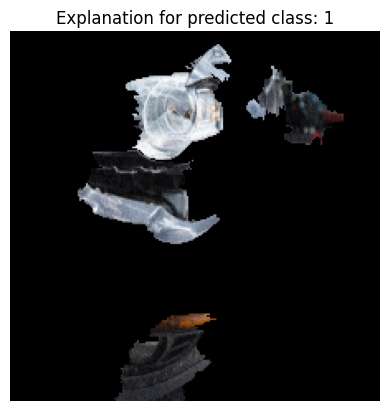

Predicted class: 1
Textual Explanation:
Feature 1: 11 with weight 0.018385184686180722
Feature 2: 16 with weight 0.015798555077777526
Feature 3: 17 with weight -0.013715011136412509
Feature 4: 6 with weight -0.009978165401413802
Feature 5: 12 with weight -0.009698766920061152
Feature 6: 8 with weight -0.007413975902248302
Feature 7: 3 with weight 0.005566178313233596
Feature 8: 9 with weight 0.0053860896783272305
Feature 9: 34 with weight 0.004576328567533403
Feature 10: 10 with weight -0.004567431831627483
Feature 11: 26 with weight 0.004560237073111817
Feature 12: 4 with weight -0.004120274573622223
Feature 13: 24 with weight -0.003915240231654619
Feature 14: 23 with weight -0.002945850021626956
Feature 15: 28 with weight -0.0027075756489563494
Feature 16: 1 with weight 0.0024855725744752765
Feature 17: 13 with weight -0.0019348743179230861
Feature 18: 30 with weight -0.001813678718644485
Feature 19: 19 with weight -0.0018066892278735833
Feature 20: 32 with weight 0.00179298293069441

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
#from lime.wrappers import ImageExplanation
from tensorflow.keras import models

# Define a function to make predictions using your model
def model_predict(input_images):
    input_images = np.array(input_images)
    # Ensure the images are in the same format as the model's input
    input_images = preprocess_input(input_images)
    # Get the predictions from the model
    predictions = model.predict(input_images)
    return predictions

# Define function to explain a random image from the test set
def explain_random_image(test_data, model):
    # Select a random image from the test set
    random_idx = np.random.randint(0, len(test_data))
    random_image_path = test_data["filename"].iloc[random_idx]

    # Load and preprocess the image
    img = image.load_img(random_image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image

    # Create an image explainer using LIME
    explainer = lime_image.LimeImageExplainer()

    # Use LIME to explain the model's prediction for the selected image
    explanation = explainer.explain_instance(
        img_array[0],  # Pass the image array (first image in the batch)
        model_predict,  # Prediction function
        top_labels=5,  # Top 5 predicted classes to explain
        hide_color=0,  # Hide color to simplify visualization
        num_samples=1000  # Number of perturbations
    )

    # Get the top predicted class (for explanation)
    top_class = explanation.top_labels[1]

    # Show the explanation for the top class
    temp, mask = explanation.get_image_and_mask(top_class, positive_only=True, num_features=5, hide_rest=True)
    plt.imshow(temp)
    plt.title(f"Explanation for predicted class: {top_class}")
    plt.axis('off')
    plt.show()

    # Print the textual explanation
    print(f"Predicted class: {top_class}")
    print("Textual Explanation:")
    for i, feature in enumerate(explanation.local_exp[top_class]):
        print(f"Feature {i+1}: {feature[0]} with weight {feature[1]}")

# Call the function to explain a random image
explain_random_image(test_data, model)


In [ ]:
!pip install torch torchvision transformers lavis

ERROR: Could not find a version that satisfies the requirement lavis (from versions: none)
ERROR: No matching distribution found for lavis


In [ ]:
# Upgrade pip
!pip install --upgrade pip

# Install PyTorch (adjust the command based on your CUDA version)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

# Install LAVIS
!pip install salesforce-lavis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 71.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Looking in indexes: https://download.pytorch.org/whl/cu121
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 193.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 127.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━

  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 137.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 114.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 129.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 130.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 139.1 MB/s eta 0

In [ ]:
!pip install accelerate==1.0.1
!pip install bitsandbytes==0.44.1
!pip install transformers==4.30.0

  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.5.2
    Uninstalling accelerate-1.5.2:
      Successfully uninstalled accelerate-1.5.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 84.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.26.1
    Uninstalling transformers-4.26.1:
      Successfully uninstalled transformers-4.26.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
salesforce-lavis 1.0.2 requires transformers<4.27,>=4.25.0, but you have transformers 4.30.0 which is incompatible.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.30.0 which is incompatible.


In [ ]:
!pip install numpy==1.26.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 135.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
salesforce-lavis 1.0.2 requires transformers<4.27,>=4.25.0, but you have transformers 4.30.0 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
albumentations 2.0.5 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-headless 4.5.5.64 which is incompatible.
albucore 0.0.23 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-headless 4.5.5.64 which is incompatible.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.30.0 which is incompatible.


In [ ]:
!pip install --upgrade transformers tokenizers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 73.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.30.0
    Uninstalling transformers-4.30.0:
      Successfully uninstalled transformers-4.30.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
salesforce-lavis 1.0.2 requires transformers<4.27,>=4.25.0, but you have transformers 4.51.3 which is incompatible.


In [ ]:
import torch
import transformers
print("PyTorch version:", torch.__version__)
print("Transformers version:", transformers.__version__)

PyTorch version: 2.6.0+cu124
Transformers version: 4.51.3


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


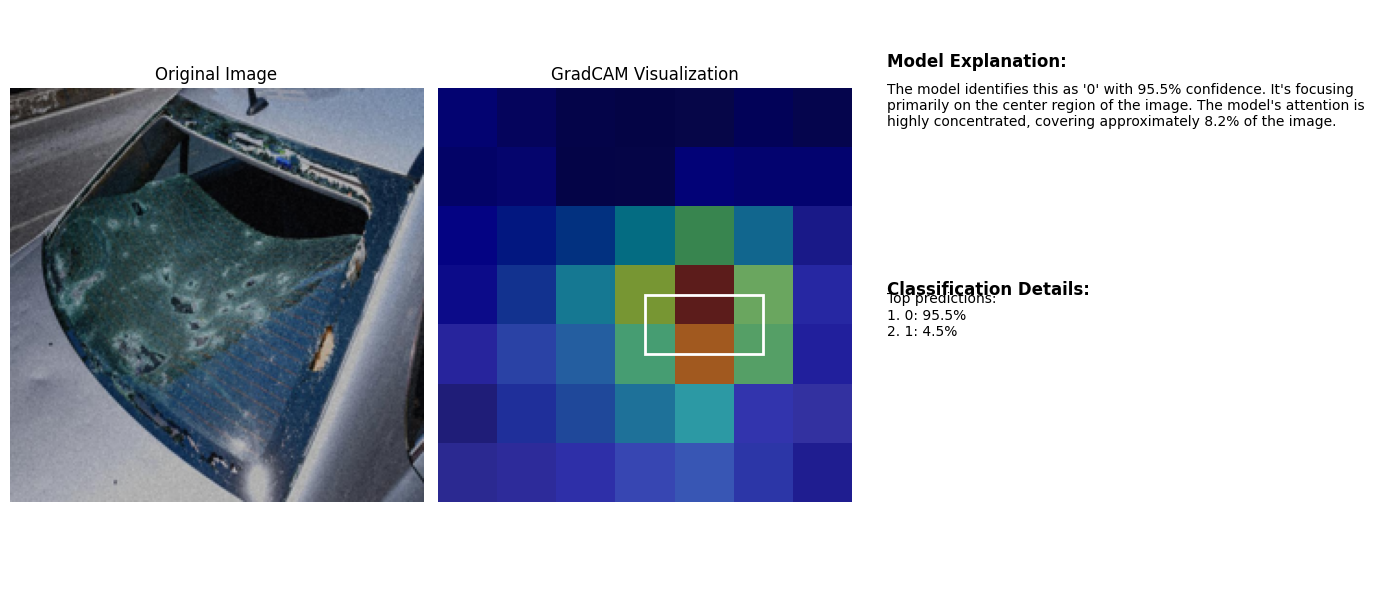

Summary:
The model identifies this as '0' with 95.5% confidence. It's focusing primarily on the center region of the image. The model's attention is highly concentrated, covering approximately 8.2% of the image. 

Top predictions:
1. 0: 95.5%
2. 1: 4.5%



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from PIL import Image
import io
import matplotlib.patches as patches

# Define function to generate Grad-CAM heatmap
def generate_gradcam_heatmap(model, img_array, last_conv_layer_name, classifier_layer_names):
    # Get the model's output for the class of interest
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        # Record the operations for automatic differentiation
        last_conv_layer_output, predictions = grad_model(img_array)
        class_idx = np.argmax(predictions[0])  # Get index of the class with max probability
        class_output = predictions[:, class_idx]
        class_probability = float(predictions[0][class_idx])

    # Get the gradient of the predicted class with respect to the last convolutional layer output
    grads = tape.gradient(class_output, last_conv_layer_output)

    # Global average pooling on the gradients to get importance of each feature map
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

    # Multiply each feature map by its importance
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = np.mean(last_conv_layer_output * pooled_grads, axis=-1)

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap, class_idx, class_probability, predictions[0]

# Generate explanation from the class prediction and heatmap
def generate_explanation(class_idx, class_probability, heatmap, class_names=None):
    # Get the class name (assuming you have a class names list)
    if class_names is None:
        # Replace with your actual class names if available
        class_names = ['class1', 'class2', 'class3']

    predicted_class = class_names[class_idx] if class_idx < len(class_names) else f"Class {class_idx}"

    # Calculate heatmap concentration areas
    # Find the regions where the heatmap is most active
    threshold = 0.5
    high_activation = np.where(heatmap > threshold)

    # Calculate heatmap statistics
    avg_activation = np.mean(heatmap)
    max_activation = np.max(heatmap)

    # Find the bounding box of high activation area
    if len(high_activation[0]) > 0:
        min_y, max_y = np.min(high_activation[0]), np.max(high_activation[0])
        min_x, max_x = np.min(high_activation[1]), np.max(high_activation[1])
        bbox_height = max_y - min_y
        bbox_width = max_x - min_x

        # Calculate the center of the high activation region
        center_y = np.mean(high_activation[0])
        center_x = np.mean(high_activation[1])

        # Determine the region
        h, w = heatmap.shape
        region = ""
        if center_y < h/3:
            if center_x < w/3:
                region = "top-left"
            elif center_x < 2*w/3:
                region = "top"
            else:
                region = "top-right"
        elif center_y < 2*h/3:
            if center_x < w/3:
                region = "left"
            elif center_x < 2*w/3:
                region = "center"
            else:
                region = "right"
        else:
            if center_x < w/3:
                region = "bottom-left"
            elif center_x < 2*w/3:
                region = "bottom"
            else:
                region = "bottom-right"

        # Concentration information
        concentration = "highly concentrated" if bbox_height * bbox_width < 0.25 * h * w else "spread out"

        # Generate explanation text
        explanation = f"The model identifies this as '{predicted_class}' with {class_probability:.1%} confidence. "
        explanation += f"It's focusing primarily on the {region} region of the image. "
        explanation += f"The model's attention is {concentration}, "
        explanation += f"covering approximately {(len(high_activation[0])/(h*w))*100:.1f}% of the image. "

        # Get bounding box coordinates for visualization
        bbox = (min_x, min_y, bbox_width, bbox_height)

    else:
        explanation = f"The model identifies this as '{predicted_class}' with {class_probability:.1%} confidence. "
        explanation += "It doesn't show strong activation in any specific region, suggesting it's looking at the overall image patterns."
        bbox = None

    return explanation, bbox

# Get top-3 predicted classes
def get_top_predictions(predictions, class_names=None, top_n=3):
    if class_names is None:
        # Replace with your actual class names if available
        class_names = [f'class{i}' for i in range(len(predictions))]

    top_indices = np.argsort(predictions)[-top_n:][::-1]
    top_classes = [(class_names[i] if i < len(class_names) else f"Class {i}",
                   float(predictions[i])) for i in top_indices]

    result = "Top predictions:\n"
    for i, (cls, prob) in enumerate(top_classes):
        result += f"{i+1}. {cls}: {prob:.1%}\n"

    return result

# Define function to display the Grad-CAM heatmap on the image with explanation
def display_gradcam_with_explanation(img_path, model, last_conv_layer_name, classifier_layer_names, class_names=None):
    # Load the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image

    # Generate Grad-CAM heatmap
    heatmap, class_idx, class_probability, predictions = generate_gradcam_heatmap(
        model, img_array, last_conv_layer_name, classifier_layer_names
    )

    # Generate explanation
    model_explanation, bbox = generate_explanation(class_idx, class_probability, heatmap, class_names)

    # Get top predictions
    top_preds = get_top_predictions(predictions, class_names)

    # Create figure with two subplots - image and text explanation
    fig = plt.figure(figsize=(14, 6))

    # Plot the original image
    ax1 = fig.add_subplot(1, 3, 1)
    img_pil = Image.open(img_path).convert('RGB')
    img_resized = img_pil.resize((224, 224))
    ax1.imshow(img_resized)
    ax1.set_title("Original Image")
    ax1.axis('off')

    # Plot the image with heatmap
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.imshow(img_resized)
    ax2.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay heatmap on image

    # Draw bounding box around high activation area if exists
    if bbox:
        min_x, min_y, bbox_width, bbox_height = bbox
        rect = patches.Rectangle((min_x, min_y), bbox_width, bbox_height,
                                linewidth=2, edgecolor='w', facecolor='none')
        ax2.add_patch(rect)

    ax2.set_title("GradCAM Visualization")
    ax2.axis('off')

    # Display the explanation
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.text(0.05, 0.9, "Model Explanation:", fontsize=12, fontweight='bold')
    ax3.text(0.05, 0.8, model_explanation, fontsize=10, wrap=True)
    ax3.text(0.05, 0.5, "Classification Details:", fontsize=12, fontweight='bold')
    ax3.text(0.05, 0.4, top_preds, fontsize=10)
    ax3.axis('off')

    plt.tight_layout()
    plt.show()

    # Generate a summary text for saving or further processing
    summary = f"Summary:\n{model_explanation}\n\n{top_preds}"

    return summary

# Function to save both visualization and explanation
def save_gradcam_with_explanation(img_path, model, last_conv_layer_name,
                                 classifier_layer_names, output_path, class_names=None):
    # Load the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image

    # Generate Grad-CAM heatmap
    heatmap, class_idx, class_probability, predictions = generate_gradcam_heatmap(
        model, img_array, last_conv_layer_name, classifier_layer_names
    )

    # Generate explanation
    model_explanation, bbox = generate_explanation(class_idx, class_probability, heatmap, class_names)

    # Get top predictions
    top_preds = get_top_predictions(predictions, class_names)

    # Create figure with two subplots - image and text explanation
    fig = plt.figure(figsize=(14, 6))

    # Plot the original image
    ax1 = fig.add_subplot(1, 3, 1)
    img_pil = Image.open(img_path).convert('RGB')
    img_resized = img_pil.resize((224, 224))
    ax1.imshow(img_resized)
    ax1.set_title("Original Image")
    ax1.axis('off')

    # Plot the image with heatmap
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.imshow(img_resized)
    ax2.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay heatmap on image

    # Draw bounding box around high activation area if exists
    if bbox:
        min_x, min_y, bbox_width, bbox_height = bbox
        rect = patches.Rectangle((min_x, min_y), bbox_width, bbox_height,
                                linewidth=2, edgecolor='w', facecolor='none')
        ax2.add_patch(rect)

    ax2.set_title("GradCAM Visualization")
    ax2.axis('off')

    # Display the explanation
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.text(0.05, 0.9, "Model Explanation:", fontsize=12, fontweight='bold')
    ax3.text(0.05, 0.8, model_explanation, fontsize=10, wrap=True)
    ax3.text(0.05, 0.5, "Classification Details:", fontsize=12, fontweight='bold')
    ax3.text(0.05, 0.4, top_preds, fontsize=10)
    ax3.axis('off')

    plt.tight_layout()

    # Save the visualization
    plt.savefig(f"{output_path}_visual.png", bbox_inches='tight')

    # Save the text explanation
    with open(f"{output_path}_explanation.txt", 'w') as f:
        f.write(f"Image Analysis for: {img_path}\n\n")
        f.write(f"{model_explanation}\n\n")
        f.write(f"{top_preds}\n")

    plt.close()

    return model_explanation, top_preds

imagenet_classes = [0,1]  # Example classes

# Select a random image from the test set
random_idx = np.random.randint(0, len(test_data))
random_image_path = test_data["filename"].iloc[random_idx]

# Call the display function
summary = display_gradcam_with_explanation(
    random_image_path,
    model,
    last_conv_layer_name="conv5_block3_out",
    classifier_layer_names="predictions",
    class_names=imagenet_classes  # Replace with your actual class names
)

# To save the results
save_gradcam_with_explanation(
    random_image_path,
    model,
    last_conv_layer_name="conv5_block3_out",
    classifier_layer_names="predictions",
    output_path=f"gradcam_result_{random_idx}",
    class_names=imagenet_classes
)

print(summary)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


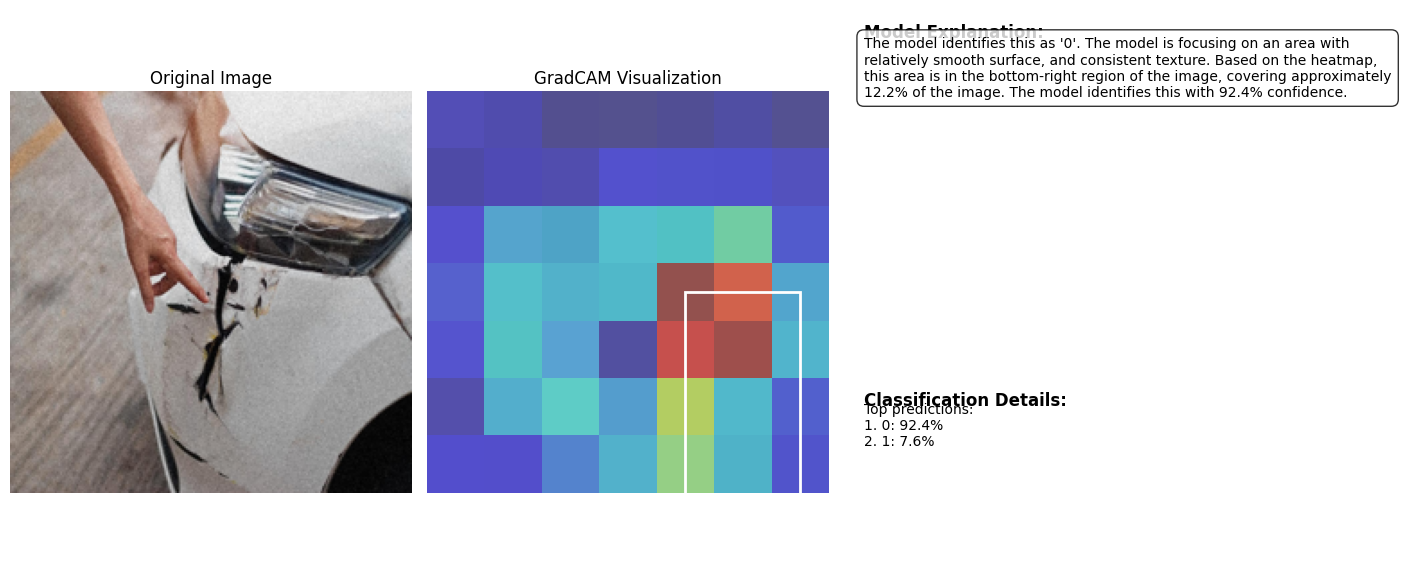

Summary:
The model identifies this as '0'. The model is focusing on an area with relatively smooth surface, and consistent texture. Based on the heatmap, this area is in the bottom-right region of the image, covering approximately 12.2% of the image. The model identifies this with 92.4% confidence.

Top predictions:
1. 0: 92.4%
2. 1: 7.6%



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.patches as patches
import cv2
from skimage.feature import hog, local_binary_pattern, canny
from skimage.color import rgb2gray
from scipy import ndimage as ndi
from skimage import morphology

# Define function to generate Grad-CAM heatmap
def generate_gradcam_heatmap(model, img_array, last_conv_layer_name, classifier_layer_names):
    # Get the model's output for the class of interest
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        # Record the operations for automatic differentiation
        last_conv_layer_output, predictions = grad_model(img_array)
        class_idx = np.argmax(predictions[0])  # Get index of the class with max probability
        class_output = predictions[:, class_idx]
        class_probability = float(predictions[0][class_idx])

    # Get the gradient of the predicted class with respect to the last convolutional layer output
    grads = tape.gradient(class_output, last_conv_layer_output)

    # Global average pooling on the gradients to get importance of each feature map
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

    # Multiply each feature map by its importance
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = np.mean(last_conv_layer_output * pooled_grads, axis=-1)

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap, class_idx, class_probability, predictions[0]

# Function to analyze image features in high activation area
def analyze_image_features(img_path, heatmap, threshold=0.5):
    # Load image in full resolution
    img = cv2.imread(img_path)
    if img is None:  # OpenCV couldn't read the image
        img = np.array(Image.open(img_path).convert('RGB'))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    # Resize image to match heatmap dimensions
    img_resized = cv2.resize(img, (heatmap.shape[1], heatmap.shape[0]))

    # Convert to grayscale for feature detection
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

    # Create a mask of high activation areas
    mask = (heatmap > threshold).astype(np.uint8)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # If no contours found, use full image
    if not contours:
        x, y, w, h = 0, 0, heatmap.shape[1], heatmap.shape[0]
    else:
        # Get the largest contour
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)

    # Ensure we have valid dimensions
    x, y, w, h = max(0, x), max(0, y), min(w, gray.shape[1]-x), min(h, gray.shape[0]-y)

    # Create a region of interest
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img_resized[y:y+h, x:x+w]

    # Detect edges in the ROI
    edges = cv2.Canny(roi_gray, 100, 200)

    # Calculate texture using Local Binary Patterns
    radius = 3
    n_points = 8 * radius
    try:
        lbp = local_binary_pattern(roi_gray, n_points, radius, method='uniform')
        lbp_mean = np.mean(lbp)
        lbp_var = np.var(lbp)
    except:
        lbp_mean, lbp_var = 0, 0

    # Feature analysis
    features = {}

    # Edge density (measure of complexity)
    features['edge_density'] = np.sum(edges > 0) / (edges.shape[0] * edges.shape[1])

    # Check for horizontal lines (possible scratches)
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))
    horizontal_lines = cv2.morphologyEx(edges, cv2.MORPH_OPEN, horizontal_kernel)
    features['horizontal_lines'] = np.sum(horizontal_lines > 0) > 10

    # Check for vertical lines
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 25))
    vertical_lines = cv2.morphologyEx(edges, cv2.MORPH_OPEN, vertical_kernel)
    features['vertical_lines'] = np.sum(vertical_lines > 0) > 10

    # Check for texture variations (high variance means rough texture)
    features['texture_variation'] = lbp_var > 20

    # Color variance (high variance could indicate discoloration or corrosion)
    hsv = cv2.cvtColor(roi_color, cv2.COLOR_BGR2HSV)
    features['color_var'] = np.var(hsv[:,:,1])  # Saturation variance

    # Calculate average color in the ROI
    avg_color = np.mean(roi_color, axis=(0, 1))
    features['avg_color'] = avg_color

    # Dark spots detection (potential corrosion or deep scratches)
    dark_threshold = np.mean(roi_gray) * 0.6
    dark_spots = (roi_gray < dark_threshold).astype(np.uint8) * 255
    dark_spots = cv2.morphologyEx(dark_spots, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))
    features['dark_spots'] = np.sum(dark_spots > 0) / (dark_spots.shape[0] * dark_spots.shape[1]) > 0.05

    # Light spots detection (potential highlights or reflections)
    light_threshold = np.mean(roi_gray) * 1.4
    light_spots = (roi_gray > light_threshold).astype(np.uint8) * 255
    light_spots = cv2.morphologyEx(light_spots, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))
    features['light_spots'] = np.sum(light_spots > 0) / (light_spots.shape[0] * light_spots.shape[1]) > 0.05

    # Shape detection
    corners = cv2.goodFeaturesToTrack(roi_gray, 25, 0.01, 10)
    features['corners'] = len(corners) if corners is not None else 0
    return features, (x, y, w, h)

# Interpret detected features and generate a description
def interpret_features(features, class_idx, class_names=None):
    descriptions = []

    # Get class name
    if class_names is None:
        predicted_class = f"Class {class_idx}"
    else:
        predicted_class = class_names[class_idx] if class_idx < len(class_names) else f"Class {class_idx}"

    # Analyze edge density
    if features['edge_density'] > 0.2:
        descriptions.append("significant surface irregularities")
    elif features['edge_density'] > 0.1:
        descriptions.append("moderate surface irregularities")
    else:
        descriptions.append("relatively smooth surface")

    # Analyze scratches (horizontal lines)
    if features['horizontal_lines']:
        descriptions.append("horizontal scratches or abrasions")

    # Analyze vertical features
    if features['vertical_lines']:
        descriptions.append("vertical cracks or damage lines")

    # Analyze texture
    if features['texture_variation']:
        descriptions.append("rough or uneven texture")
    else:
        descriptions.append("consistent texture")

    # Analyze color variations
    if features['color_var'] > 500:
        descriptions.append("significant color variation or discoloration")
    elif features['color_var'] > 200:
        descriptions.append("moderate discoloration")

    # Analyze dark spots
    if features['dark_spots']:
        descriptions.append("dark spots that could indicate corrosion or deep damage")

    # Analyze light spots
    if features['light_spots']:
        descriptions.append("light spots possibly indicating exposed material or highlights along damage edges")

    # Analyze shape complexity
    if features['corners'] > 15:
        descriptions.append("complex damage patterns")
    elif features['corners'] > 5:
        descriptions.append("distinct damage features")

    # Combine into a cohesive description
    feature_desc = ", ".join(descriptions[:-1])
    if len(descriptions) > 1:
        feature_desc += f", and {descriptions[-1]}"
    else:
        feature_desc = descriptions[0]

    # Create detailed explanation
    explanation = f"The model identifies this as '{predicted_class}'. "
    explanation += f"The model is focusing on an area with {feature_desc}. "

    # Special case for vehicle damage
    if "scratch" in feature_desc or "damage" in feature_desc or "corrosion" in feature_desc:
        if predicted_class.lower() in ["damage", "broken", "defect", "0", "1"]:
            explanation += "These visual features are consistent with surface damage, which aligns with the model's classification. "
            explanation += "The pattern and concentration of these features suggest this might be a case of "

            # Determine damage type based on features
            if features['horizontal_lines'] and features['edge_density'] > 0.15:
                explanation += "scratch damage likely caused by contact with another object. "
            elif features['dark_spots'] and features['color_var'] > 300:
                explanation += "corrosion or rust formation. "
            elif features['edge_density'] > 0.25:
                explanation += "significant structural damage or breakage. "
            else:
                explanation += "minor surface damage or wear. "

    return explanation

# Generate explanation from the class prediction and heatmap
def generate_explanation(class_idx, class_probability, heatmap, image_features, class_names=None):
    # Get the class name (assuming you have a class names list)
    if class_names is None:
        # Replace with your actual class names if available
        class_names = [0,1]

    predicted_class = class_names[class_idx] if class_idx < len(class_names) else f"Class {class_idx}"

    # Get a detailed feature description
    detailed_description = interpret_features(image_features[0], class_idx, class_names)

    # Calculate heatmap concentration areas
    threshold = 0.5
    high_activation = np.where(heatmap > threshold)

    # Calculate heatmap statistics
    avg_activation = np.mean(heatmap)
    max_activation = np.max(heatmap)

    # Find the bounding box of high activation area
    if len(high_activation[0]) > 0:
        # Use the bounding box from feature analysis
        bbox = image_features[1]
        min_x, min_y, bbox_width, bbox_height = bbox

        # Calculate the center of the high activation region
        center_y = min_y + bbox_height/2
        center_x = min_x + bbox_width/2

        # Determine the region
        h, w = heatmap.shape
        region = ""
        if center_y < h/3:
            if center_x < w/3:
                region = "top-left"
            elif center_x < 2*w/3:
                region = "top"
            else:
                region = "top-right"
        elif center_y < 2*h/3:
            if center_x < w/3:
                region = "left"
            elif center_x < 2*w/3:
                region = "center"
            else:
                region = "right"
        else:
            if center_x < w/3:
                region = "bottom-left"
            elif center_x < 2*w/3:
                region = "bottom"
            else:
                region = "bottom-right"

        # Combine the detailed description with positional information
        explanation = f"{detailed_description}"
        explanation += f"Based on the heatmap, this area is in the {region} region of the image, "
        explanation += f"covering approximately {(len(high_activation[0])/(h*w))*100:.1f}% of the image. "
        explanation += f"The model identifies this with {class_probability:.1%} confidence."

    else:
        explanation = f"The model identifies this as '{predicted_class}' with {class_probability:.1%} confidence. "
        explanation += "It doesn't show strong activation in any specific region, suggesting it's looking at the overall image patterns."

    return explanation, bbox

# Get top-3 predicted classes
def get_top_predictions(predictions, class_names=None, top_n=3):
    top_n = min(top_n, len(predictions))

    if class_names is None:
        # Replace with your actual class names if available
        class_names = [f'class{i}' for i in range(len(predictions))]

    top_indices = np.argsort(predictions)[-top_n:][::-1]
    top_classes = [(class_names[i] if i < len(class_names) else f"Class {i}",
                   float(predictions[i])) for i in top_indices]

    result = "Top predictions:\n"
    for i, (cls, prob) in enumerate(top_classes):
        result += f"{i+1}. {cls}: {prob:.1%}\n"

    return result

# Define function to display the Grad-CAM heatmap on the image with explanation
def display_gradcam_with_explanation(img_path, model, last_conv_layer_name, classifier_layer_names, class_names=None):
    # Load the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image

    # Generate Grad-CAM heatmap
    heatmap, class_idx, class_probability, predictions = generate_gradcam_heatmap(
        model, img_array, last_conv_layer_name, classifier_layer_names
    )

    # Analyze image features in the high-activation area
    image_features = analyze_image_features(img_path, heatmap)

    # Generate explanation
    model_explanation, bbox = generate_explanation(class_idx, class_probability, heatmap, image_features, class_names)

    # Get top predictions
    top_preds = get_top_predictions(predictions, class_names)

    # Create figure with two subplots - image and text explanation
    fig = plt.figure(figsize=(14, 6))

    # Plot the original image
    ax1 = fig.add_subplot(1, 3, 1)
    img_pil = Image.open(img_path).convert('RGB')
    img_resized = img_pil.resize((224, 224))
    ax1.imshow(img_resized)
    ax1.set_title("Original Image")
    ax1.axis('off')

    # Plot the image with heatmap
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.imshow(img_resized)
    ax2.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay heatmap on image

    # Draw bounding box around high activation area if exists
    if bbox:
        min_x, min_y, bbox_width, bbox_height = bbox
        rect = patches.Rectangle((min_x, min_y), bbox_width, bbox_height,
                                linewidth=2, edgecolor='w', facecolor='none')
        ax2.add_patch(rect)

    ax2.set_title("GradCAM Visualization")
    ax2.axis('off')

    # Display the explanation
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.text(0.05, 0.95, "Model Explanation:", fontsize=12, fontweight='bold')
    # Wrap text to fit the axis
    ax3.text(0.05, 0.85, model_explanation, fontsize=10, wrap=True,
             bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8))

    ax3.text(0.05, 0.3, "Classification Details:", fontsize=12, fontweight='bold')
    ax3.text(0.05, 0.2, top_preds, fontsize=10)
    ax3.axis('off')

    plt.tight_layout()
    plt.show()

    # Generate a summary text for saving or further processing
    summary = f"Summary:\n{model_explanation}\n\n{top_preds}"

    return summary

# Function to save both visualization and explanation
def save_gradcam_with_explanation(img_path, model, last_conv_layer_name,
                                 classifier_layer_names, output_path, class_names=None):
    # Load the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image

    # Generate Grad-CAM heatmap
    heatmap, class_idx, class_probability, predictions = generate_gradcam_heatmap(
        model, img_array, last_conv_layer_name, classifier_layer_names
    )

    # Analyze image features in the high-activation area
    image_features = analyze_image_features(img_path, heatmap)

    # Generate explanation
    model_explanation, bbox = generate_explanation(class_idx, class_probability, heatmap, image_features, class_names)

    # Get top predictions
    top_preds = get_top_predictions(predictions, class_names)

    # Create figure with subplots
    fig = plt.figure(figsize=(14, 6))

    # Plot the original image
    ax1 = fig.add_subplot(1, 3, 1)
    img_pil = Image.open(img_path).convert('RGB')
    img_resized = img_pil.resize((224, 224))
    ax1.imshow(img_resized)
    ax1.set_title("Original Image")
    ax1.axis('off')

    # Plot the image with heatmap
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.imshow(img_resized)
    ax2.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay heatmap on image

    # Draw bounding box around high activation area if exists
    if bbox:
        min_x, min_y, bbox_width, bbox_height = bbox
        rect = patches.Rectangle((min_x, min_y), bbox_width, bbox_height,
                                linewidth=2, edgecolor='w', facecolor='none')
        ax2.add_patch(rect)

    ax2.set_title("GradCAM Visualization")
    ax2.axis('off')

    # Display the explanation
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.text(0.05, 0.95, "Model Explanation:", fontsize=12, fontweight='bold')
    ax3.text(0.05, 0.85, model_explanation, fontsize=10, wrap=True,
            bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8))

    ax3.text(0.05, 0.3, "Classification Details:", fontsize=12, fontweight='bold')
    ax3.text(0.05, 0.2, top_preds, fontsize=10)
    ax3.axis('off')

    plt.tight_layout()

    # Save the visualization
    plt.savefig(f"{output_path}_visual.png", bbox_inches='tight')

    # Save the text explanation
    with open(f"{output_path}_explanation.txt", 'w') as f:
        f.write(f"Image Analysis for: {img_path}\n\n")
        f.write(f"{model_explanation}\n\n")
        f.write(f"{top_preds}\n")

    plt.close()

    return model_explanation, top_preds

# Example usage
damage_classes = [0,1]  # Example classes for damage detection

# Select a random image from the test set
random_idx = np.random.randint(0, len(test_data))
random_image_path = test_data["filename"].iloc[random_idx]

# Call the display function
summary = display_gradcam_with_explanation(
    random_image_path,
    model,
    last_conv_layer_name="conv5_block3_out",
    classifier_layer_names="predictions",
    class_names=damage_classes  # Replace with your actual class names
)

# To save the results
save_gradcam_with_explanation(
    random_image_path,
    model,
    last_conv_layer_name="conv5_block3_out",
    classifier_layer_names="predictions",
    output_path=f"gradcam_result_{random_idx}",
    class_names=damage_classes
)

print(summary)